## Image denoising

In [102]:
from skimage import io, data, img_as_ubyte, filters, img_as_float
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft2, fftshift, ifft2
from scipy.signal import convolve2d
import cv2
import os
from skimage.color import rgb2gray , rgb2yuv, rgb2hsv, yuv2rgb, hsv2rgb

#ssim and mse 
from skimage.metrics import structural_similarity as ssim, mean_squared_error as mse
from skimage.restoration import ( denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)

# bm3d
import bm3d

from skimage.exposure import equalize_hist, match_histograms

from skimage.filters import gaussian, laplace, rank

In [2]:
## helper functions

def min_max(image):
    print('Minimum value: ' ,image.min())
    print('Maximum value: ',image.max())
#######################################


############################

def compare(im1,im2):
    mse_value = mse(im1, im2)
    ssim_value = ssim(im1, im2, channel_axis=-1)

    print('SSIM value is :', ssim_value)
    print('MSE value is :', mse_value , '\n')
    
###########################






In [ ]:
from PIL import Image
import glob

nois10 = []
for filename in glob.glob('Images/noisy10/*.png'): 
    im=Image.open(filename)
    nois10.append(np.asarray(im))
    
nois25 = []
for filename in glob.glob('Images/noisy25/*.png'): 
    im=Image.open(filename)
    nois25.append(np.asarray(im))

nois50 = []
for filename in glob.glob('Images/noisy50/*.png'): 
    im=Image.open(filename)
    nois50.append(np.asarray(im))
    
org = []
for filename in glob.glob('Images/original/*.png'): 
    im=Image.open(filename)
    org.append(np.asarray(im))
    

def display_img(num):
    plt.figure()
    f, ((ax1, ax2), (ax3, ax4))= plt.subplots(2, 2, figsize=(12,12))
    
    ax1.imshow(org[num])
    ax1.set_title('Original')
    
    ax2.imshow(nois10[num])
    ax2.set_title('Noise level 10')
    
    ax3.imshow(nois25[num])
    ax3.set_title('Noise level 25')
    
    ax4.imshow(nois50[num])
    ax4.set_title('Noise level 50')
    


<Figure size 432x288 with 0 Axes>

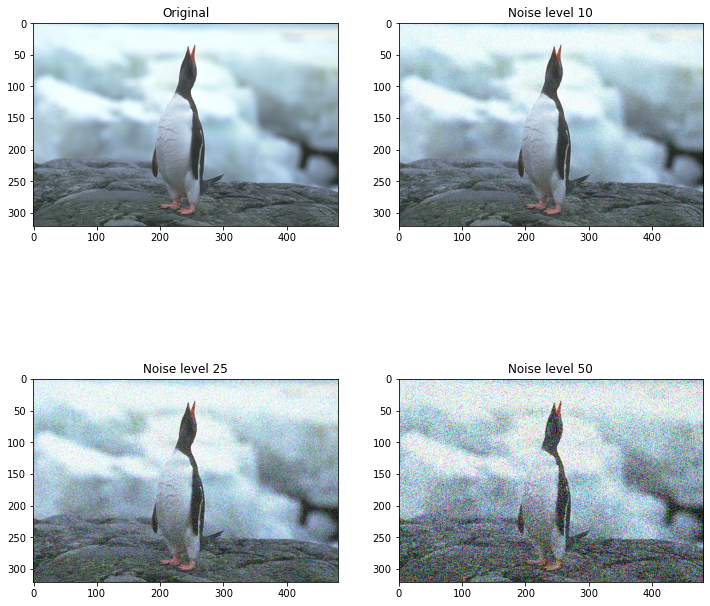

In [224]:
display_img(13)

## Identify the noise in image 
#### by plotting histogram of homogeneous region of graycale image

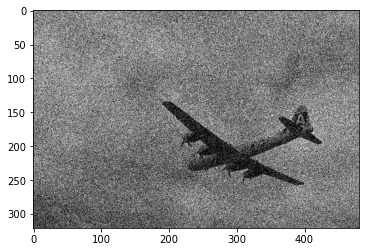

In [6]:
plt.imshow(rgb2gray(nois50[0]), cmap='gray')

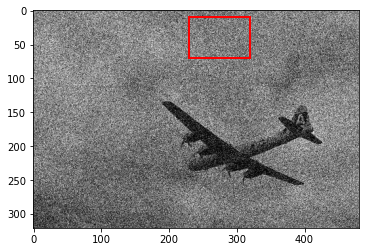

In [14]:
import matplotlib.patches as patches

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(rgb2gray(nois50[0]), cmap='gray')

# Create a Rectangle patch
rect = patches.Rectangle((230, 70), 90, -60, linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

### I will take this region as it appears the most homogeneous patch of all images 

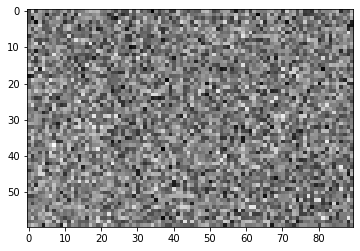

In [301]:
gray_homogeneous = rgb2gray(nois50[0][10:70,230:320])
plt.imshow(gray_homogeneous,cmap='gray')

(array([  0.,   0.,   1.,   4.,   5.,  13.,  25.,  30.,  29.,  34.,  55.,
         74.,  84.,  82., 110., 125., 169., 209., 235., 238., 241., 275.,
        312., 268., 350., 296., 280., 252., 260., 214., 183., 184., 158.,
        125., 118.,  82.,  68.,  61.,  49.,  34.,  25.,  13.,  18.,  10.,
          1.,   0.,   0.,   1.,   0.]),
 array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
        0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
        0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
        0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
        0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
        0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
        0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
        0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
        0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
        0.91836735, 0.93877551, 0.95918367, 0.979591

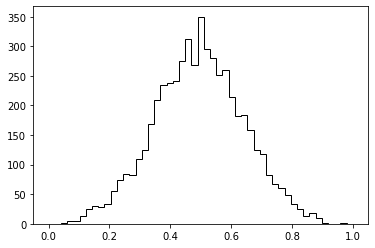

In [302]:
v = np.concatenate(gray_homogeneous)
bins = np.linspace(0, 1, 50)
plt.hist(v, bins, color='k', histtype='step')

#### This bell shape/gaussian curve tells us the noise present is Gaussian noise

In [7]:
# FINDING NOISE LEVEL (STANDARD DEVIATION)

np.std(nois50[0][10:70,230:320])

49.84882341490599

#### std of 50 explains the noise is Gaussian noise with σ = 50 

# Denoising methods

### median filter

In [8]:

def median_filter(denoise, lvl):


    j=0
    for i in denoise:
        if (lvl == 10):
            new = cv2.medianBlur(nois10[i],7)        
        elif (lvl == 25):
            new = cv2.medianBlur(nois25[i],5)        
        elif (lvl ==50):
            new = cv2.medianBlur(nois50[i],5)        
        else:
            print('Print select appropriate noise level')
        

        
        
        
        # PLOTTING
        fig = plt.figure(figsize=(12,12))

        ax = plt.subplot(121)
        p  = ax.imshow(new)
        ax.set_title('Denoised image')
        
        
        ax = plt.subplot(122)
        p = ax.imshow(org[i])
        ax.set_title('Original image')
        
        
        
        print('Comparison of Image',j)
        compare(new, org[i])
        j+=1
    
        

Comparison of Image 0
SSIM value is : 0.42983172327839175
MSE value is : 187.75250376184957 

Comparison of Image 1
SSIM value is : 0.4448159008528996
MSE value is : 394.1526047974646 

Comparison of Image 2
SSIM value is : 0.4831382190297589
MSE value is : 289.0276962800327 

Comparison of Image 3
SSIM value is : 0.4919335134321468
MSE value is : 393.4219337957656 

Comparison of Image 4
SSIM value is : 0.4175638854241555
MSE value is : 293.4834359881089 



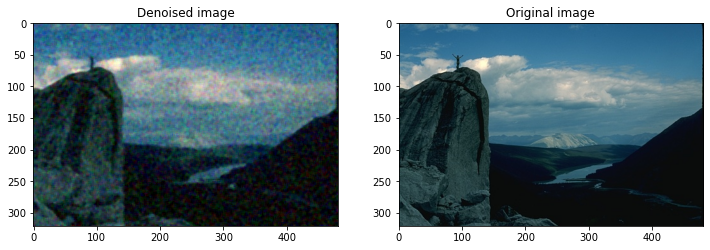

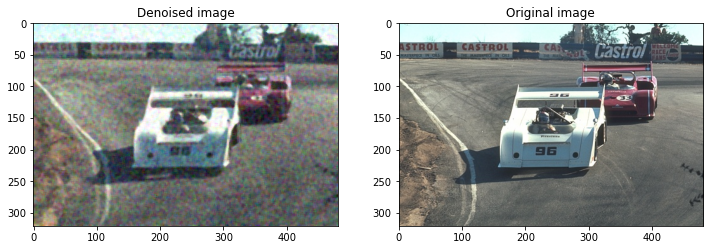

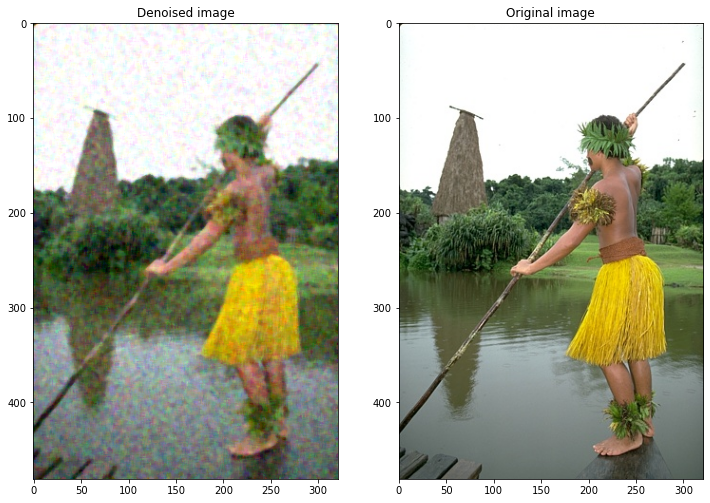

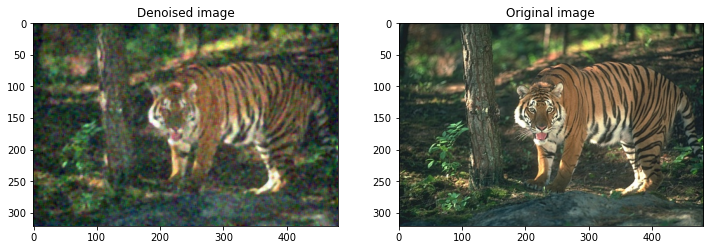

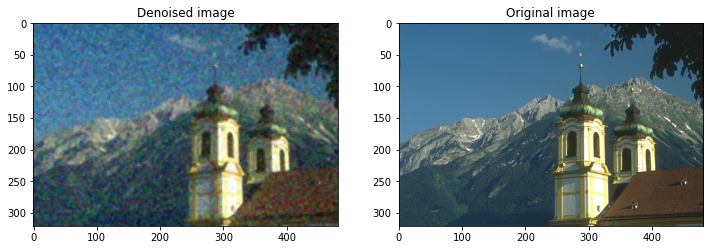

In [235]:

median_filter(denoise,50)

### mean filter

In [10]:
# mean filter


def mean_filter(denoise, lvl):


    j=0
    for i in denoise:
        if (lvl == 10):
            new = cv2.blur(nois10[i],(6,6))
        elif (lvl == 25):
            new = cv2.blur(nois25[i],(6,6))
        elif (lvl ==50):
            new = cv2.blur(nois50[i],(6,6))
        else:
            print('Print select appropriate noise level')
        

        
        # PLOTTING
        fig = plt.figure(figsize=(12,12))

        ax = plt.subplot(121)
        p  = ax.imshow(new)
        ax.set_title('Denoised image')
        
        ax = plt.subplot(122)
        p = ax.imshow(org[i])
        ax.set_title('Original image')
        
        
        
        print('Comparison of Image',j)
        compare(new, org[i])
        j+=1
    

Comparison of Image 0
SSIM value is : 0.5603550072464049
MSE value is : 187.17662234484663 

Comparison of Image 1
SSIM value is : 0.49920574953366864
MSE value is : 429.49249033361184 

Comparison of Image 2
SSIM value is : 0.5742971214274676
MSE value is : 395.3650667202069 

Comparison of Image 3
SSIM value is : 0.5155588388875285
MSE value is : 398.10463231023977 

Comparison of Image 4
SSIM value is : 0.5362530628017909
MSE value is : 269.45614341876023 



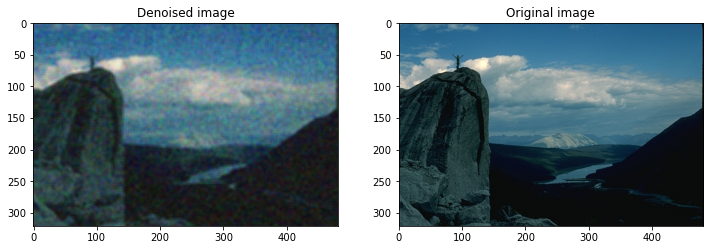

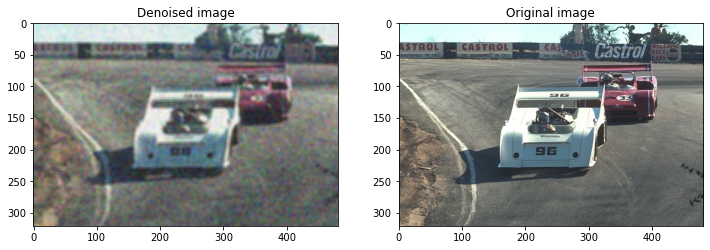

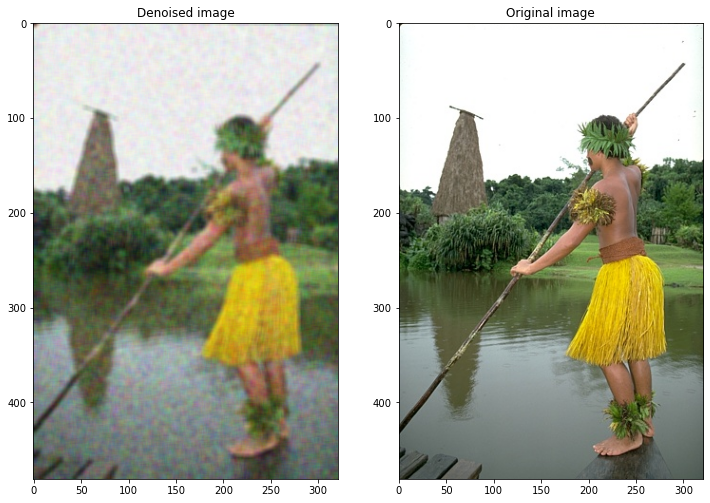

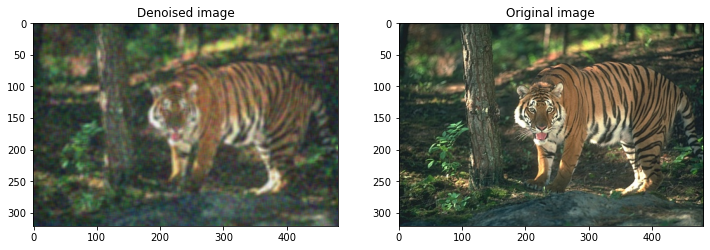

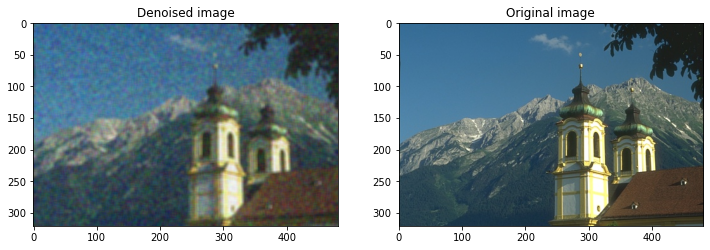

In [234]:
mean_filter(denoise, 50)

### VisuShrink filter

In [12]:
def visuShrink(denoise, lvl):
    j=0
    for i in denoise:
        if (lvl == 10):
            sigma_est = estimate_sigma(nois10[i], average_sigmas=True)
            im_visushrink = denoise_wavelet(nois10[i], convert2ycbcr=True, channel_axis=-1,
                                method='VisuShrink', mode='soft',
                                sigma=50/15, rescale_sigma=True)        
        elif (lvl == 25):
            sigma_est = estimate_sigma(nois25[i], average_sigmas=True)
            im_visushrink = denoise_wavelet(nois25[i], convert2ycbcr=True, channel_axis=-1,
                                method='VisuShrink', mode='soft',
                                sigma=50/10, rescale_sigma=True)        
        elif (lvl ==50):
            sigma_est = estimate_sigma(nois50[i], average_sigmas=True)
            im_visushrink = denoise_wavelet(nois50[i], convert2ycbcr=True, channel_axis=-1,
                                method='VisuShrink', mode='soft',
                                sigma=50/20, rescale_sigma=True)        
        else:
            print('Print select appropriate noise level')
        
        # PLOTTING
        fig = plt.figure(figsize=(12,12))

        ax = plt.subplot(121)
        p  = ax.imshow(im_visushrink)
        ax.set_title('Denoised image')
        
        ax = plt.subplot(122)
        p = ax.imshow(org[i])
        ax.set_title('Original image')
        
        print('Comparison of Image',j)
        compare(im_visushrink, img_as_float(org[i]))
        j+=1


Comparison of Image 0
SSIM value is : 0.3436750842379878
MSE value is : 0.022504534982572367 

Comparison of Image 1
SSIM value is : 0.3248117567265572
MSE value is : 0.020059055247231485 

Comparison of Image 2
SSIM value is : 0.3315414296846673
MSE value is : 0.021224674210106688 



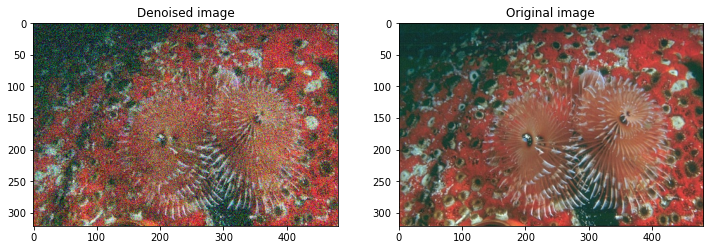

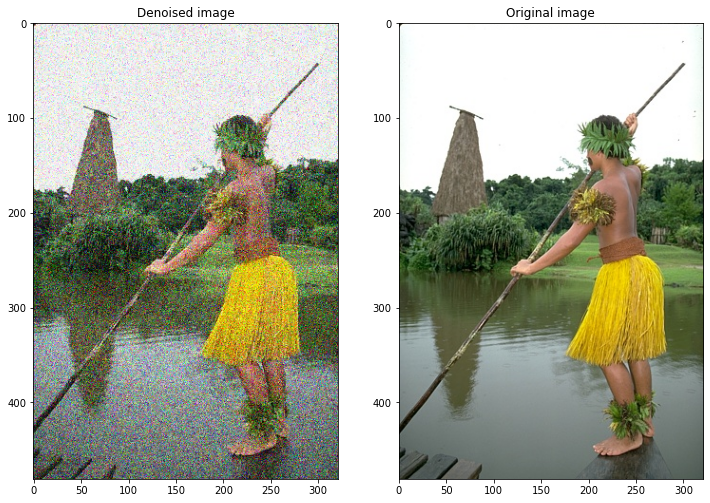

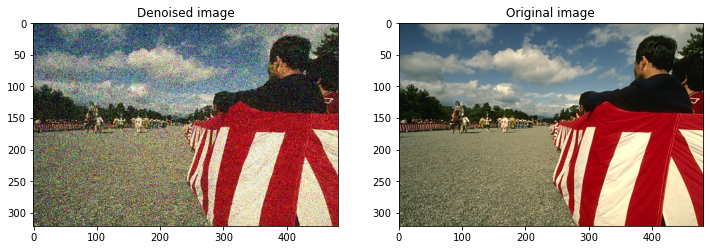

In [17]:
denoise = [1,9,24]
visuShrink(denoise,50)

### BayesShrink filter

In [237]:
def bayesShrink(denoise, lvl):
    j=0
    for i in denoise:
        if (lvl == 10):
            sigma_est = estimate_sigma(nois10[i], average_sigmas=True)
            im_bayes = denoise_wavelet(nois10[i], convert2ycbcr=True, channel_axis=-1,
                           method='BayesShrink', mode='soft', sigma=sigma_est/0.5,
                           rescale_sigma=True)        
        elif (lvl == 25):
            sigma_est = estimate_sigma(nois25[i], average_sigmas=True)
            im_bayes = denoise_wavelet(nois25[i], convert2ycbcr=True, channel_axis=-1,
                           method='BayesShrink', mode='soft', sigma=sigma_est/0.5,
                           rescale_sigma=True)       
        elif (lvl ==50):
            sigma_est = estimate_sigma(nois50[i], average_sigmas=True)
            im_bayes = denoise_wavelet(nois50[i], convert2ycbcr=True, channel_axis=-1,
                           method='BayesShrink', mode='soft', sigma=sigma_est/0.5,
                           rescale_sigma=True)      
        else:
            print('Print select appropriate noise level')
        
        
        # PLOTTING
        fig = plt.figure(figsize=(12,12))

        ax = plt.subplot(121)
        p  = ax.imshow(im_bayes)
        ax.set_title('Denoised image')
        
        ax = plt.subplot(122)
        p = ax.imshow(org[i])
        ax.set_title('Original image')
        
        print('Comparison of Image',j)
        compare(im_bayes, img_as_float(org[i]))
        j+=1
        

Comparison of Image 0
SSIM value is : 0.7775169364665784
MSE value is : 0.00302090213572204 

Comparison of Image 1
SSIM value is : 0.7305720371469632
MSE value is : 0.0061458330870789064 

Comparison of Image 2
SSIM value is : 0.7704768651566236
MSE value is : 0.006295829457413295 

Comparison of Image 3
SSIM value is : 0.6887026306943018
MSE value is : 0.005895294084074536 

Comparison of Image 4
SSIM value is : 0.7749551455429993
MSE value is : 0.004439148713923322 



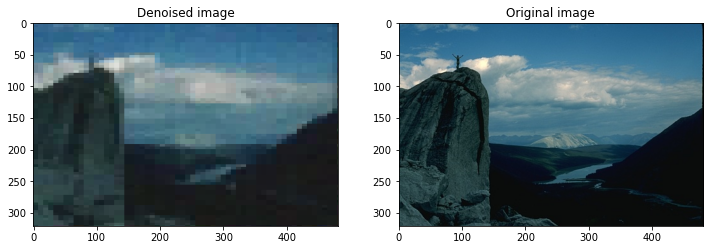

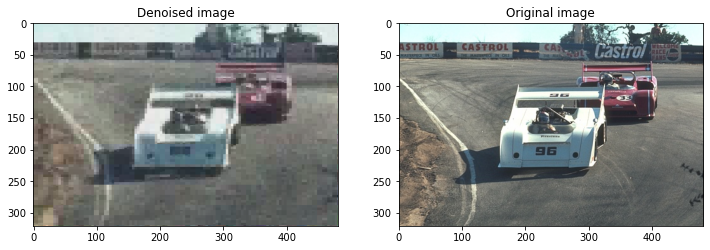

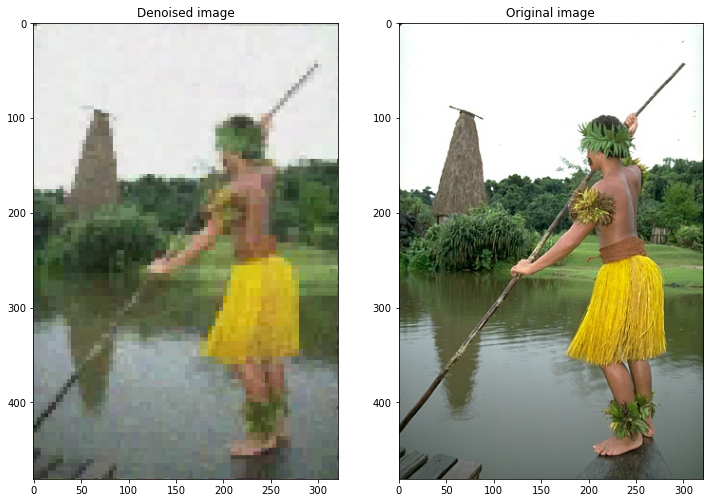

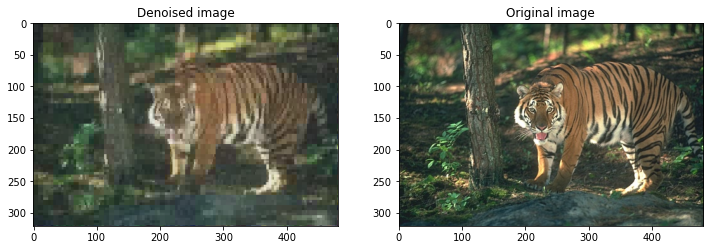

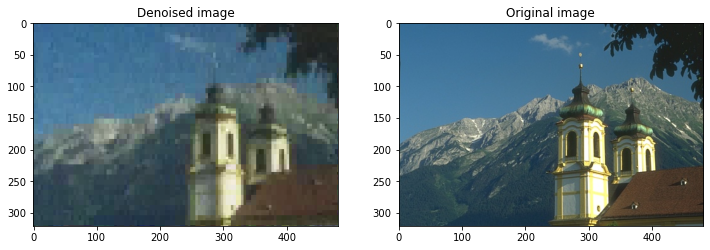

In [238]:
bayesShrink(denoise,50)

# Proposed algo :

In [258]:
def gaus_low_pass(list_img, lvl):
    imp =[]
    for v in list_img:
        if (lvl == 10):
            im = img_as_float(nois10[v])
        elif (lvl == 25):
            im = img_as_float(nois25[v])
        elif (lvl == 50):
            im = img_as_float(nois50[v])
        else :
            print('Print select appropriate noise level')
            
            
        transformed_channels = []
        for i in range(3):
                
        
            xs, ys = np.array(im.shape[0:2])
            xl = np.linspace(0,xs,xs)
            yl = np.linspace(0,ys,ys)
            x, y = np.meshgrid(xl, yl)
            x = (x-xs/2)/xs
            y = (y-ys/2)/ys
            s = 0.25
            imw = np.exp(-(x**2+y**2)/(2*s**2))
            
            imfft = fftshift(fft2(im[:, :, i]))
            imfft = imfft * imw.T
            imf = np.abs(ifft2(imfft))
            imm = np.log(np.abs(imfft))
            imm = imm * imw.T
            transformed_channels.append(imf)
        
        
            
        gaus_img = np.dstack([transformed_channels[0], 
                                 transformed_channels[1], 
                                 transformed_channels[2]])
        imp.append(gaus_img)
    return imp
        #plt.imshow(gaus_img)
        
        
def bm3d_filter(img_list):
    import bm3d
    imp = []
    for i in img_list:
        
        imd = bm3d.bm3d(i, sigma_psd=0.1764, stage_arg=bm3d.BM3DStages.ALL_STAGES)   
        imp.append(imd)

    return imp

### Enhancing edges

#kernel
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

# convolution
def multi_convolver(image, kernel, iterations):
    for i in range(iterations):
        image = convolve2d(image, kernel, 'same', boundary = 'fill',
                           fillvalue = 0)
    return image


# refining edges
def enhance_img(img_list, kernel, iterations = 1):
    imp = []
    for i in img_list:    
        img_yuv = rgb2yuv(i)   
        img_yuv[:,:,0] = multi_convolver(img_yuv[:,:,0], kernel, 
                                     iterations)
        final_image = yuv2rgb(img_yuv)
        imp.append(final_image)
    
    return imp

def plot_result(denoise,imp):
    for i, j in zip(denoise, imp):
        fig = plt.figure(figsize=(12,12))

        ax = plt.subplot(121)
        p  = ax.imshow(j)
        ax.set_title('Denoised image')
        
        ax = plt.subplot(122)
        p = ax.imshow(org[i])
        ax.set_title('Original image')
        
        print('Comparison of Image',)
        compare(j, img_as_float(org[i]))
        
    


### Executing algorithm

In [247]:

denoise = [2,5,9,14,20]  # specify image number

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Comparison of Image
SSIM value is : 0.8902803360818674
MSE value is : 0.0015711455515529083 

Comparison of Image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SSIM value is : 0.8351351466776271
MSE value is : 0.006254604965880996 

Comparison of Image
SSIM value is : 0.8516533562877834
MSE value is : 0.0059153014926346965 

Comparison of Image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SSIM value is : 0.8176032952450362
MSE value is : 0.0031612703155998612 

Comparison of Image
SSIM value is : 0.8667747158127207
MSE value is : 0.0026077226708700264 



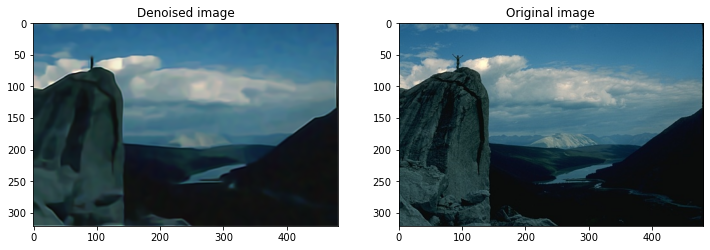

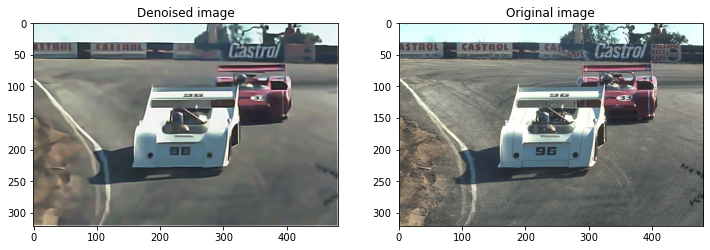

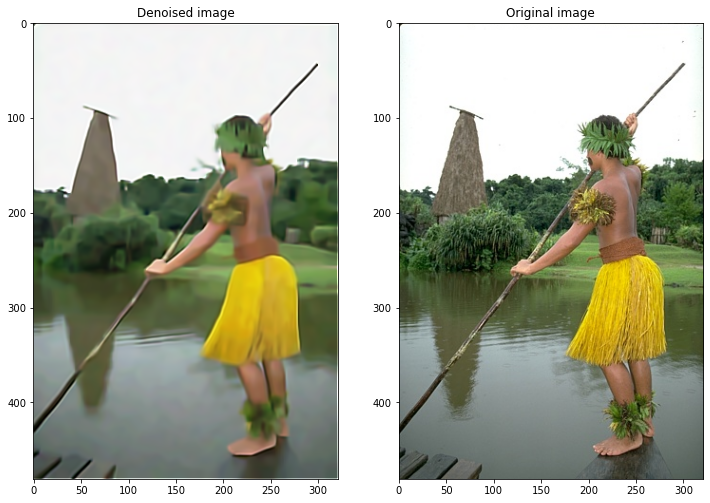

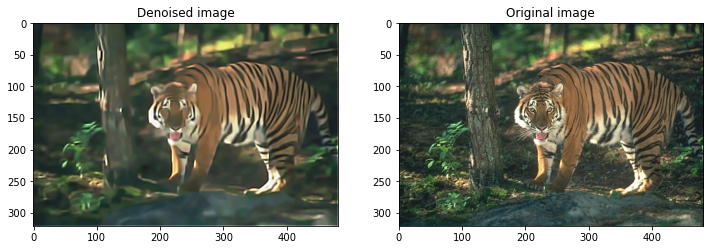

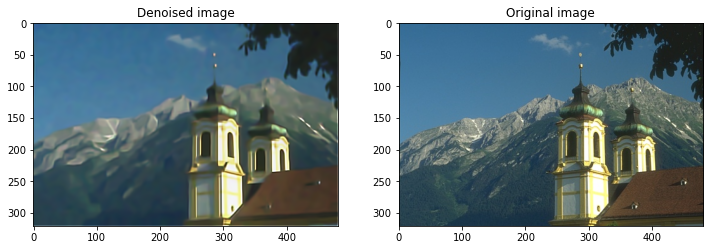

In [248]:
m = gaus_low_pass(denoise,25)
g = bm3d_filter(m)
h = enhance_img(g, sharpen,1)
plot_result(denoise, h)